In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from textblob import TextBlob

In [2]:
import extract_dataframe as exdf
import clean_tweets_dataframe as cldf

"""
_, global_tweets_data = exdf.read_json('data/global_twitter_data.json')

global_tweets = exdf.TweetDfExtractor(global_tweets_data)

df_global = global_tweets.get_tweet_df(save = True, file_name = 'data/global_processed_tweets.csv')

"""

"""
_, africa_tweets_data = exdf.read_json('data/africa_twitter_data.json')

africa_tweets = exdf.TweetDfExtractor(africa_tweets_data)

df_africa = africa_tweets.get_tweet_df(save = True, file_name = 'data/africa_processed_tweets.csv')

"""

# Global Tweets

lets first take a look at the global tweets.

1. Load the data

In [3]:
df_global = pd.read_csv('data/global_processed_tweets.csv')

2. Explore the data

In [4]:
df_global.shape

(22000, 16)

In [5]:
df_global.head(4)

,statuses_coun,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,8097,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-0.125,0.190625,en,15760,2,i_ameztoy,20497,2621,NaN,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",NaN
1,5831,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-0.100,0.100000,en,6967,201,ZIisq,65,272,NaN,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN
2,1627,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000,0.000000,en,2166,0,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,1627,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",0.100,0.350000,en,2166,0,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands


In [6]:
# .info() Gives a quick look at the data in the datafarme shape, datatypes and missing data

df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_coun       22000 non-null  int64  
 1   created_at          22000 non-null  object 
 2   source              22000 non-null  object 
 3   original_text       22000 non-null  object 
 4   polarity            22000 non-null  float64
 5   subjectivity        22000 non-null  float64
 6   lang                22000 non-null  object 
 7   favorite_count      22000 non-null  int64  
 8   retweet_count       22000 non-null  int64  
 9   original_author     22000 non-null  object 
 10  followers_count     22000 non-null  int64  
 11  friends_count       22000 non-null  int64  
 12  possibly_sensitive  6191 non-null   object 
 13  hashtags            22000 non-null  object 
 14  user_mentions       22000 non-null  object 
 15  place               12107 non-null  object 
dtypes: f

In [7]:
# drop duplicates

df_global.drop_duplicates(inplace=True)


# drop tweets that are from unknown locations

df_global.dropna(subset=['place'], inplace=True)


# languages: all the tweets are in english

df_global = df_global[df_global['lang'] == 'en']

In [8]:
# reset the indices to start from 0, 1, ...

df_global.reset_index(drop=True, inplace=True)

In [9]:
# get some descriptive statistics on the data

df_global.describe()

,statuses_coun,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,1.210600e+04,12106.000000,12106.000000,1.210600e+04,12106.000000,1.210600e+04,12106.000000
mean,6.789020e+04,0.061398,0.284090,4.375276e+04,168.805716,2.919568e+04,2029.471171
std,1.708511e+05,0.226423,0.289589,9.978165e+04,512.721586,4.011366e+05,5290.088104
min,1.000000e+00,-1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.547250e+03,0.000000,0.000000,1.554500e+03,2.000000,1.260000e+02,232.000000
50%,1.626550e+04,0.000000,0.207702,1.078800e+04,27.000000,5.435000e+02,744.000000
75%,5.588125e+04,0.133333,0.483333,4.236150e+04,173.000000,2.175750e+03,2246.750000
max,4.108317e+06,1.000000,1.000000,1.717879e+06,17409.000000,1.449852e+07,208360.000000


In [10]:
"""
df_global.drop(columns = ['statuses_coun', 'polarity', 'subjectivity', 'favorite_count', 'retweet_count', 
                   'followers_count', 'friends_count']).describe()
"""

#most frequent locations

df_global['place'].value_counts().head(10)

India              200
United States      166
Hong Kong          152
Việt Nam           118
Taiwan              99
USA                 95
New York, USA       84
Taipei, Taiwan      75
Pakistan            70
London, England     69
Name: place, dtype: int64

3. Clean the text

In [11]:
df_global['original_text']

0        China even cut off communication, they don't a...
1        Putin to #XiJinping : I told you my friend, Ta...
2        RT @ChinaUncensored: I’m sorry, I thought Taiw...
3        RT @benedictrogers: We must not let this happe...
4        RT @ChinaInfo777: #PinkFloyd singer Roger Wate...
                               ...                        
12101    Reports say that #China is planning to seize #...
12102    RT @ChinaDaily: #QuotesInNews Chinese State Co...
12103    RT @IndoPac_Info: A good infographic of #China...
12104                  @Reuters Thanks #Pelosi smart move.
12105    RT @IndoPac_Info: #Taiwan people's Desire for ...
Name: original_text, Length: 12106, dtype: object

In [12]:
df_global['clean_text'] = df_global['original_text'].astype(str)
df_global['clean_text'] = df_global['clean_text'].apply(lambda x: x.lower())
df_global['clean_text']= df_global['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

In [40]:
blob_list = [TextBlob(x) for x in df_global['clean_text']]

pol_list = [x.sentiment.polarity for x in blob_list]
subj_list = [x.sentiment.subjectivity for x in blob_list]

In [42]:
df_global['cln_polarity'] = pol_list
df_global['cln_subjectivity'] = subj_list

In [47]:
def sentiment_text(x: float)-> str:
    x = round(x, 2)
    if x <0:
        return "negative"
    elif x > 0:
        return "positive"
    else:
        return "neutral"

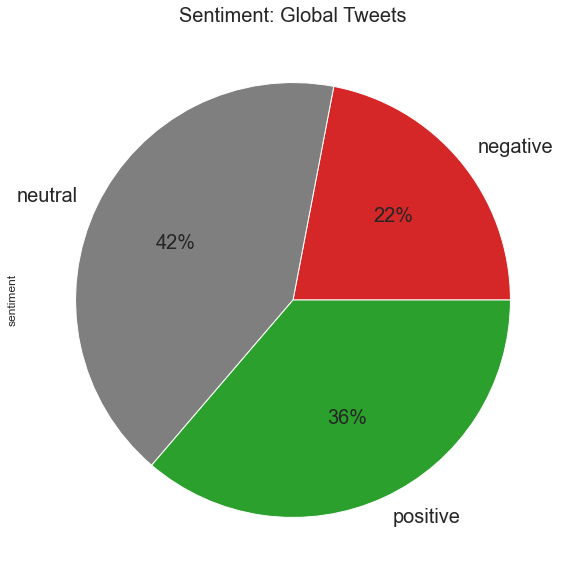

In [48]:
df_global["sentiment"] = df_global["cln_polarity"].apply(sentiment_text)

# Distribution of sentiments across all the tweets.
sns.set(rc={'figure.figsize':(14,10)})
df_global['sentiment'].value_counts().sort_index().plot(kind='pie', 
                                                     autopct='%1.0f%%', 
                                                     colors=["tab:red", "tab:gray", "tab:green"], 
                                                     textprops={'fontsize': 20})
plt.title("Sentiment: Global Tweets", fontsize = 20)
plt.savefig("global_sentiment.jpg")


# African Tweets

Now we consider tweets from Africa.

In [49]:
df_africa = pd.read_csv('data/africa_processed_tweets.csv')

In [50]:
df_africa.shape

(28608, 16)

In [51]:
df_africa.head(4)

,statuses_coun,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,888,Wed Aug 03 20:19:13 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,697,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie
1,1597,Tue Aug 02 15:24:42 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,2160,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN
2,2293,Tue Aug 02 15:02:35 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,10841,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie
3,44,Mon Aug 01 13:51:42 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,280,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef


In [52]:
# .info() Gives a quick look at the data in the datafarme shape, datatypes and missing data

df_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28608 entries, 0 to 28607
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_coun       28608 non-null  int64  
 1   created_at          28608 non-null  object 
 2   source              28608 non-null  object 
 3   original_text       28608 non-null  object 
 4   polarity            28608 non-null  float64
 5   subjectivity        28608 non-null  float64
 6   lang                28608 non-null  object 
 7   favorite_count      28608 non-null  int64  
 8   retweet_count       28608 non-null  int64  
 9   original_author     28608 non-null  object 
 10  followers_count     28608 non-null  int64  
 11  friends_count       28608 non-null  int64  
 12  possibly_sensitive  22148 non-null  object 
 13  hashtags            28608 non-null  object 
 14  user_mentions       28608 non-null  object 
 15  place               28099 non-null  object 
dtypes: f

In [53]:
# drop duplicates

df_africa.drop_duplicates(inplace=True)


# drop tweets that are from unknown locations

df_africa.dropna(subset=['place'], inplace=True)


# languages: all the tweets are in english

df_africa = df_africa[df_africa['lang'] == 'en']

In [54]:
# reset the indices to start from 0, 1, ...

df_africa.reset_index(drop=True, inplace=True)

In [55]:
# get some descriptive statistics on the data

df_africa.describe()

,statuses_coun,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,6.837000e+03,6837.000000,6837.000000,6837.000000,6837.000000,6.837000e+03,6837.000000
mean,4.151174e+04,0.106806,0.315418,12433.744625,3.275121,3.130600e+04,1547.534884
std,1.991647e+05,0.271142,0.316772,35546.162561,33.459795,1.318800e+05,4079.490161
min,1.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,6.270000e+02,0.000000,0.000000,330.000000,0.000000,1.460000e+02,146.000000
50%,3.452000e+03,0.000000,0.262500,1893.000000,0.000000,5.580000e+02,502.000000
75%,2.069400e+04,0.225000,0.535714,7843.000000,1.000000,3.134000e+03,1833.000000
max,2.761099e+06,1.000000,1.000000,500598.000000,1460.000000,1.427930e+06,103751.000000


In [58]:
"""
df_africa.drop(columns = ['statuses_coun', 'polarity', 'subjectivity', 'favorite_count', 'retweet_count', 
                   'followers_count', 'friends_count']).describe()
"""

#most frequent locations

df_africa['place'].value_counts().head(20) # there are values from KSA, UAE, .. need to remove them first

Lagos, Nigeria                 764
Nigeria                        604
universe center                389
Nairobi, Kenya                 278
United Arab Emirates           271
Global South                   193
Saudi Arabia                   180
South Africa                   132
Dubai, United Arab Emirates    129
Ghana                          128
Abuja, Nigeria                 108
Karachi, Pakistan              106
Dubai                           98
Accra, Ghana                    98
Johannesburg, South Africa      77
Lagos                           68
Greater Accra, Ghana            65
Kampala, Uganda                 62
Petach Tikva                    57
Pretoria, South Africa          50
Name: place, dtype: int64

3. Clean the text

In [59]:
df_africa['original_text']

0       #Pelosi airplane landed safely in #Taiwan 🇹🇼  ...
1       #Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...
2       #HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...
3       #Pelosi\n#china\nChina Time ✌️ https://t.co/tE...
4       V382 Intro Logo Animation Blue Smoke 💙\n\nIf y...
                              ...                        
6832    Download Gold Tik Tok app 2022 | How to instal...
6833    The US and China out there in the china sea pl...
6834    Wheels down Taipei\n#Pelosi #SPAR19 https://t....
6835    Final approach to Taipei\n#Pelosi #SPAR19 http...
6836    Where is Paul #Pelosi today?\n\nAsking for a f...
Name: original_text, Length: 6837, dtype: object

In [60]:
df_africa['clean_text'] = df_africa['original_text'].astype(str)
df_africa['clean_text'] = df_africa['clean_text'].apply(lambda x: x.lower())
df_africa['clean_text']= df_africa['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

In [61]:
blob_list = [TextBlob(x) for x in df_africa['clean_text']]

df_africa['cln_polarity'] = [x.sentiment.polarity for x in blob_list]
df_africa['cln_subjectivity']= [x.sentiment.subjectivity for x in blob_list]

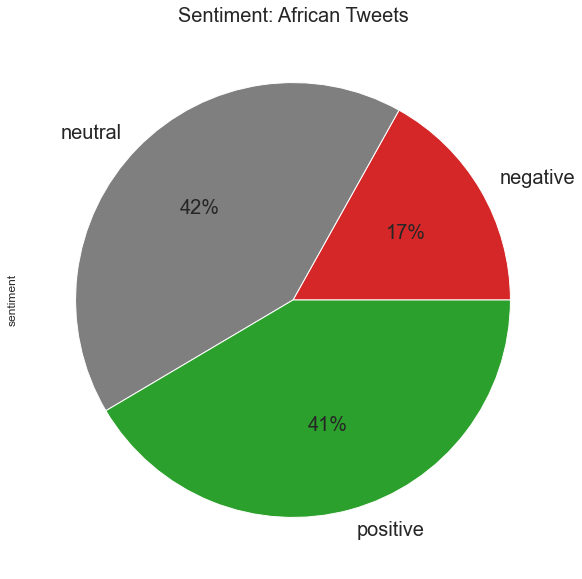

In [62]:
df_africa["sentiment"] = df_africa["cln_polarity"].apply(sentiment_text)

# Distribution of sentiments across all the tweets.
sns.set(rc={'figure.figsize':(14,10)})
df_africa.sentiment.value_counts().sort_index().plot(kind='pie', 
                                                     autopct='%1.0f%%', 
                                                     colors=["tab:red", "tab:gray", "tab:green"], 
                                                     textprops={'fontsize': 20})
plt.title("Sentiment: African Tweets", fontsize= 20)
plt.savefig("africa_sentiment.jpg")

